In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats.stats import pearsonr

# Import data and merge

In [2]:
# import metadata
qmeta = pd.read_csv('../data/T1_SMDS_metadata_ms.txt', sep='\t')

In [3]:
# log transform data
qmeta['log2_16S_copies_median'] = np.log2(qmeta['qPCR_median_16S_copies_per_2ul_DNA'])
qmeta['log2_avg_cellsperul'] = np.log2(qmeta['FC_avg_cells_per_ul'])

# Microbial load estimation in flow cytometry vs qPCR

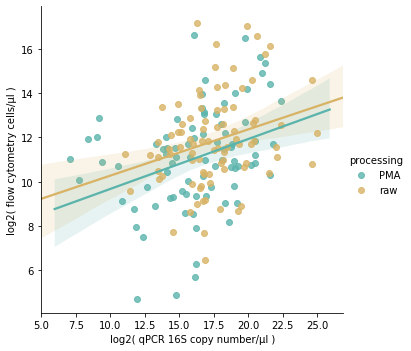

In [4]:
# plot microbial load calculated by flow cytometry (y-axis) vs 16S copy number calculated by qPCR (x-axis)
ax = sns.lmplot(x='log2_16S_copies_median',y='log2_avg_cellsperul', hue='processing',data=qmeta, 
                palette=dict(PMA="#5ab4ac", raw="#d8b365"))
ax.set(ylabel='log2( flow cytometry cells/µl )')
ax.set(xlabel='log2( qPCR 16S copy number/µl )')

In [5]:
# subset out raw and PMA samples and drop missing values for correlation testing
raw = qmeta[qmeta['processing']=='raw'].dropna(subset=['log2_16S_copies_median','log2_avg_cellsperul'])
pma = qmeta[qmeta['processing']=='PMA'].dropna(subset=['log2_16S_copies_median','log2_avg_cellsperul'])

In [6]:
# Cacluclate pearson score of flow cytometry to qPCR in raw samples
stats.pearsonr(raw['log2_16S_copies_median'], raw['log2_avg_cellsperul'])

(0.272017757383057, 0.01081035009355016)

In [7]:
# Cacluclate pearson score of flow cytometry to qPCR in PMA samples
stats.pearsonr(pma['log2_16S_copies_median'], pma['log2_avg_cellsperul'])

(0.3331820947717943, 0.001955512308030087)

# 16S copies vs flow rate

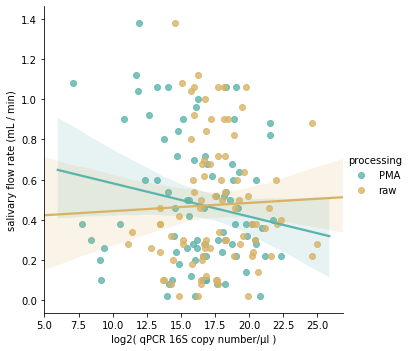

In [8]:
# plot the number of 16S copies calculated by qPCR by salivary flow rate
ax = sns.lmplot(x='log2_16S_copies_median',y='saliva_flow_rate_mL_per_min', hue='processing',data=qmeta,
                palette=dict(PMA="#5ab4ac", raw="#d8b365"))
ax.set(ylabel='salivary flow rate (mL / min)')
ax.set(xlabel='log2( qPCR 16S copy number/µl )')

In [9]:
# Cacluclate pearson score of 16S copy number calculated by qPCR to salivary flow rate in raw samples
stats.pearsonr(raw['log2_16S_copies_median'], raw['saliva_flow_rate_mL_per_min'])

(0.03426993354138616, 0.7526721136627753)

In [10]:
# Cacluclate pearson score of 16S copy number calculated by qPCR to salivary flow rate in PMA samples
stats.pearsonr(pma['log2_16S_copies_median'], pma['saliva_flow_rate_mL_per_min'])

(-0.17749533260329886, 0.10625659197568124)